In [24]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from scipy.fft import fft2, fftshift

In [26]:
img = skimage.data.camera()
img = skimage.transform.resize(img, (200, 500))
fft = fftshift(fft2(img))
amp = np.log1p(np.abs(fft))
ang = np.angle(fft)

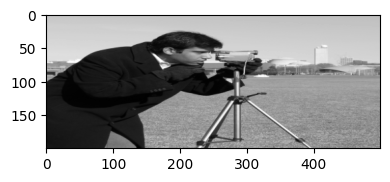

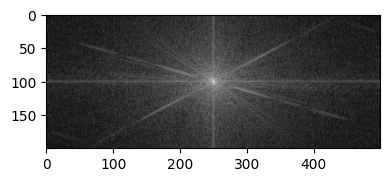

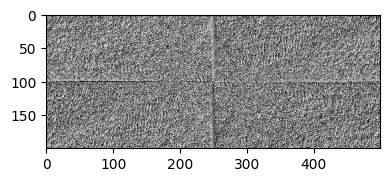

In [54]:
def show(img):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img, cmap="gray")
    fig.tight_layout()
    plt.show()

show(img)
show(amp)
show(ang)

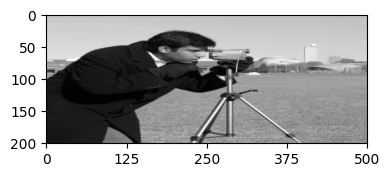

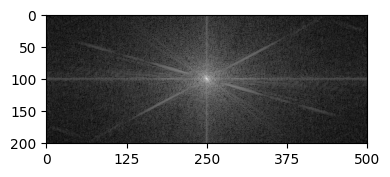

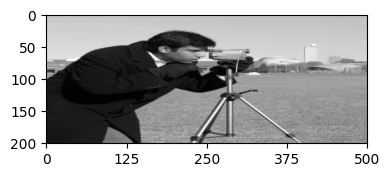

In [71]:
class Image:
    def __init__(self, data):
        self.data = data
        self.title = ""
        self.dtype = "img"
        self.shifted = False

    def set_data(self, data):
        self._data = data
        return self

    def set_title(self, title):
        self._title = title
        return self
    
    def set_dtype(self, dtype):
        self._dtype = dtype
        return self
    
    def set_shifted(self, shifted):
        self._shifted = shifted
        return self

class Viewer:
    def __init__(self):
        self.figsize = 4, 4
        self.cmap = "gray"
        
    def set_figsize(self, width, height):
        self.figsize = width, height
        return self
    
    def set_cmap(self, cmap):
        self.cmap = cmap
        return self

    def xticks(self, img):
        N = img.data.shape[1]
        return [0, N//4, N//2, 3*N//4, N]

    def yticks(self, img):
        M = img.data.shape[0]
        return [0, M//4, M//2, 3*M//4, M]

    def xticklabels(self, img):
        N = img.data.shape[1]
        if img.shifted:
            if img.dtype == "ang":
                return ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
            else:
                return [-N//2, -N//4, 0, N//4, N//2]
        else:
            if img.dtype == "ang":
                return [0, "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
            else:
                return [0, N//4, N//2, 3*N//4, N]

    def yticklabels(self, img):
        M = img.data.shape[0]
        if img.shifted:
            if img.dtype == "ang":
                return ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
            else:
                return [-M//2, -M//4, 0, M//4, M//2]
        else:
            if img.dtype == "ang":
                return [0, "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
            else:
                return [0, M//4, M//2, 3*M//4, M]

    def show(self, img):
        fig, ax = plt.subplots(figsize=self.figsize)
        ax.imshow(img.data, cmap=self.cmap)
        ax.set_title(img.title)
        ax.set_xticks(self.xticks(img))
        ax.set_yticks(self.yticks(img))
        ax.set_xticklabels(self.xticklabels(img))
        ax.set_yticklabels(self.yticklabels(img))

        fig.tight_layout()
        plt.show()

data = skimage.data.camera()
data = skimage.transform.resize(data, (200, 500))
img = Image(data)
fft = Image(fftshift(fft2(img.data)))
amp = Image(np.log1p(np.abs(fft.data)))
ang = Image(np.angle(fft.data))

if 0:
    img.dtype = "img"; img.shifted = False; img.title = "Camera Man"
    amp.dtype = "amp"; amp.shifted = True; amp.title = "Amplitude"
    ang.dtype = "ang"; ang.shifted = True; ang.title = "Phase"
if 1:
    img = img.set_dtype("img").set_shifted(False).set_title("Camera Man")
    amp = amp.set_dtype("amp").set_shifted(True).set_title("Amplitude")
    ang = img.set_dtype("ang").set_shifted(True).set_title("Phase")

viewer = Viewer()
viewer.show(img)
viewer.show(amp)
viewer.show(ang)